In [ ]:
!pip install cuqipy

In [ ]:
import cuqi
import numpy as np
import matplotlib.pyplot as plt

#### **Problem 1: Sinc Signal**

In [ ]:

# Extract Forward model using cuqipy predefined testproblem
A, y_obs, info = cuqi.testproblem.Deconvolution1D(
    dim=128,
    PSF='gauss',
    phantom='sinc',
    noise_type='gaussian',
    noise_std=0.01
    ).get_components()

# Phantom Types: square, bumps, hat, gauss, vonMises, derivGauss, pc, skyscraper,

# Define True Signal Exact data and noise
x_true = info.exactSolution  # The exact solution (true signal)
y_true = info.exactData      # Exact data without noise
noise = (y_obs - y_true)     # Noise


# Define Prior Distribution
d = 200 # prior precision
x = cuqi.distribution.GMRF(np.zeros(A.domain_dim),d) # Gaussian Markov Random Field Prior
print('Prior distribution:',x)


# Setting Likelihood function
print(info.infoString) # Noise type
y = cuqi.distribution.Gaussian(A @ x, 0.01**2) # Define Likelihood


# Setting Up Bayesian Problem
Bayesian_problem = cuqi.problem.BayesianProblem(y, x)
Bayesian_problem.set_data(y=y_obs)


# Posterior Sampling
posterior_samples = Bayesian_problem.sample_posterior(1000)


# Posterior Analysis & Uncertainty Quantification
x_map = Bayesian_problem.MAP() # MAP Estimate
x_mean = posterior_samples.mean() # Posterior Mean
x_var = posterior_samples.variance() # Posterior Variance
x_credible_interval = posterior_samples.compute_ci(0.95)



Prior distribution: CUQI GMRF.
Noise type: Additive Gaussian with std: 0.01
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is a work-in-progress. !!!
!!!       Always validate the computed results.        !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using cuqi.sampler LinearRTO sampler.
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 26.46584725379944
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is a work-in-progress !!!
!!!      Always validate the computed results.       !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.minimize on negative log of Posterior
x0: ones vector


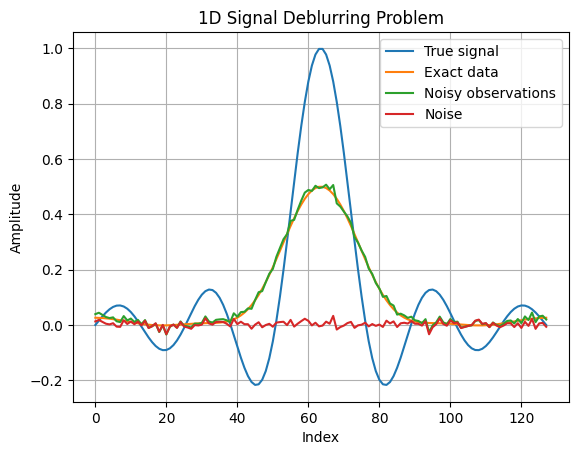

In [ ]:
# Plotting Problem Description
plt.plot(x_true,label='True signal')
plt.plot(y_true,label='Exact data')
plt.plot(y_obs,label='Noisy observations')
plt.plot(noise, label='Noise')
plt.title('1D Signal Deblurring Problem')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


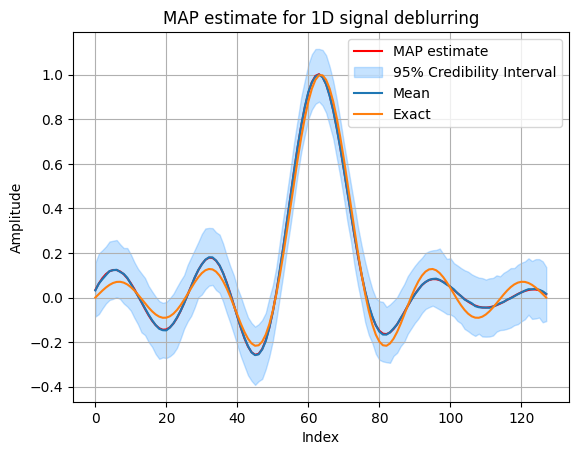

In [ ]:
# Plotting Results
x_map.plot(label='MAP estimate',color='red')    # MAP estimate of posterior
Sinc_plot_ci = posterior_samples.plot_ci(95,exact=info.exactSolution) # contains ceridble interval and mean
plt.title('MAP estimate for 1D signal deblurring')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

#### **Problem 2: DerivGauss**

In [ ]:

# Extract Forward model using cuqipy predefined testproblem
A, y_obs, info = cuqi.testproblem.Deconvolution1D(
    dim=128,
    PSF='gauss',
    phantom='derivGauss',
    noise_type='gaussian',
    noise_std=0.01
    ).get_components()

# Phantom Types: square, bumps, hat, gauss, vonMises, derivGauss, pc, skyscraper,

# Define True Signal Exact data and noise
x_true = info.exactSolution  # The exact solution (true signal)
y_true = info.exactData      # Exact data without noise
noise = (y_obs - y_true)     # Noise


# Define Prior Distribution
d = 200 # prior precision
x = cuqi.distribution.GMRF(np.zeros(A.domain_dim),d) # Gaussian Markov Random Field Prior
print('Prior distribution:',x)


# Setting Likelihood function
print(info.infoString) # Noise type
y = cuqi.distribution.Gaussian(A @ x, 0.01**2) # Define Likelihood


# Setting Up Bayesian Problem
Bayesian_problem = cuqi.problem.BayesianProblem(y, x)
Bayesian_problem.set_data(y=y_obs)


# Posterior Sampling
posterior_samples = Bayesian_problem.sample_posterior(1000)


# Posterior Analysis & Uncertainty Quantification
x_map = Bayesian_problem.MAP() # MAP Estimate
x_mean = posterior_samples.mean() # Posterior Mean
x_var = posterior_samples.variance() # Posterior Variance
x_credible_interval = posterior_samples.compute_ci(0.95)



Prior distribution: CUQI GMRF.
Noise type: Additive Gaussian with std: 0.01
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is a work-in-progress. !!!
!!!       Always validate the computed results.        !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using cuqi.sampler LinearRTO sampler.
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 4.713587284088135
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is a work-in-progress !!!
!!!      Always validate the computed results.       !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.minimize on negative log of Posterior
x0: ones vector


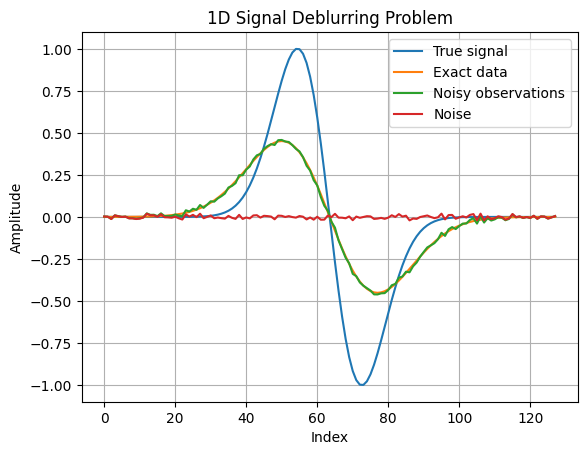

In [ ]:
# Plotting Problem Description
plt.plot(x_true,label='True signal')
plt.plot(y_true,label='Exact data')
plt.plot(y_obs,label='Noisy observations')
plt.plot(noise, label='Noise')
plt.title('1D Signal Deblurring Problem')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


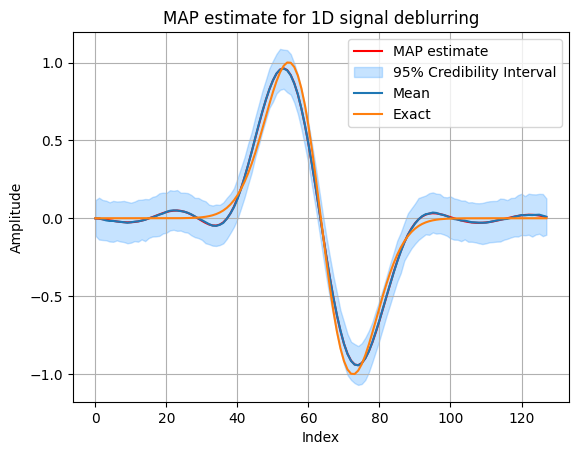

In [ ]:
# Plotting Results
x_map.plot(label='MAP estimate',color='red')    # MAP estimate of posterior
Sinc_plot_ci = posterior_samples.plot_ci(95,exact=info.exactSolution) # contains ceridble interval and mean
plt.title('MAP estimate for 1D signal deblurring')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

In [ ]:

# Extract Forward model using cuqipy predefined testproblem
A, y_obs, info = cuqi.testproblem.Deconvolution1D(
    dim=128,
    PSF='gauss',
    phantom='hat',
    noise_type='gaussian',
    noise_std=0.01
    ).get_components()

# Phantom Types: square, bumps, hat, gauss, vonMises, derivGauss, pc, skyscraper,

# Define True Signal Exact data and noise
x_true = info.exactSolution  # The exact solution (true signal)
y_true = info.exactData      # Exact data without noise
noise = (y_obs - y_true)     # Noise


# Define Prior Distribution
scale = 0.01 # prior precision
x = cuqi.distribution.CMRF(np.zeros(A.domain_dim),scale) # Gaussian Markov Random Field Prior
print('Prior distribution:',x)


# Setting Likelihood function
print(info.infoString) # Noise type
y = cuqi.distribution.Gaussian(A @ x, 0.01**2) # Define Likelihood


# Setting Up Bayesian Problem
Bayesian_problem = cuqi.problem.BayesianProblem(y, x)
Bayesian_problem.set_data(y=y_obs)


# Posterior Sampling
posterior_samples = Bayesian_problem.sample_posterior(1000)


# Posterior Analysis & Uncertainty Quantification
x_map = Bayesian_problem.MAP() # MAP Estimate
x_mean = posterior_samples.mean() # Posterior Mean
x_var = posterior_samples.variance() # Posterior Variance
x_credible_interval = posterior_samples.compute_ci(0.95)



Prior distribution: CUQI CMRF.
Noise type: Additive Gaussian with std: 0.01
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is a work-in-progress. !!!
!!!       Always validate the computed results.        !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using cuqi.sampler No-U-Turn (NUTS) sampler
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 154.15547156333923
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is a work-in-progress !!!
!!!      Always validate the computed results.       !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.L_BFGS_B on negative log of Posterior
x0: ones vector


#### **Problem 4: Custom Problem**

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cuqi

# Step 1: Define Custom Signal
def custom_signal(x):
    """
    Custom signal function: f(x) = cos(x) + sin(x).
    """
    return np.cos(x) + np.sin(x)

# Generate x_data and compute the true signal (y_data)
x_data = np.linspace(0, 2 * np.pi, 128)  # Domain: [0, 2π] with 128 points
x_true = custom_signal(x_data)           # True signal


# Extract the Forward Model from CUQIpy
Model, _, _ = cuqi.testproblem.Deconvolution1D(
    dim=128,              # 128 points in the domain
    PSF='gauss',          # Gaussian convolution kernel
    noise_type='gaussian', # Gaussian noise
    noise_std=0.01        # Noise standard deviation
).get_components()

# Obtain the Gaussian Convolution Matrix
A = Model.get_matrix()

# Apply Convolution to the Signal
y_true = A @ x_true

# Add Noise to the Convolved Signal
noise = np.random.normal(0, 0.1, 128)  # Additive Gaussian noise
y_obs = y_true + noise


# Step 2: Define Prior
prior_precision = 200 # Precision of the GMRF
x = cuqi.distribution.GMRF(np.zeros(128), prior_precision)

# Step 3: Define Likelihood
y = cuqi.distribution.Gaussian(Model @ x, 0.1)

# Step 4: Setup Bayesian Problem
Bayesian_problem = cuqi.problem.BayesianProblem(y, x)
Bayesian_problem.set_data(y=y_obs)

# Sample from the Posterior Distribution
posterior_samples = Bayesian_problem.sample_posterior(2000)

# Posterior Mean and Variance
x_map = Bayesian_problem.MAP() # Compute Maximum A Posteriori (MAP) Estimate
posterior_mean = posterior_samples.mean()  # Posterior Mean
posterior_variance = posterior_samples.variance()  # Posterior Variance
x_credible_interval = posterior_samples.compute_ci(0.95) # Posterior Credible interval


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is a work-in-progress. !!!
!!!       Always validate the computed results.        !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using cuqi.sampler LinearRTO sampler.
burn-in: 20%
Sample 2400 / 2400
Elapsed time: 8.819314956665039
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is a work-in-progress !!!
!!!      Always validate the computed results.       !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.minimize on negative log of Posterior
x0: ones vector


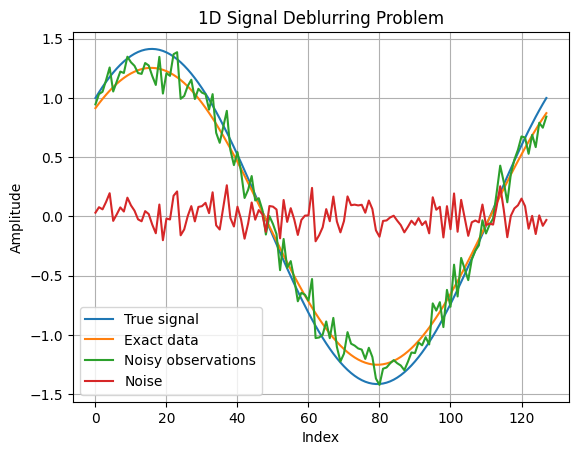

In [ ]:
# Plotting Problem Description
plt.plot(x_true,label='True signal')
plt.plot(y_true,label='Exact data')
plt.plot(y_obs,label='Noisy observations')
plt.plot(noise, label='Noise')
plt.title('1D Signal Deblurring Problem')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


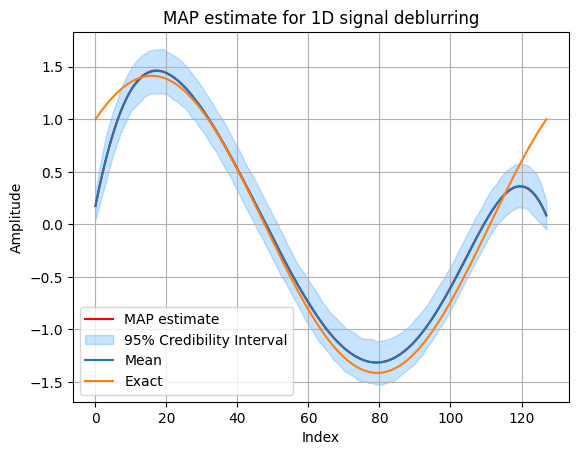

In [ ]:
# Plotting Results
x_map.plot(label='MAP estimate',color='red')    # MAP estimate of posterior
Sinc_plot_ci = posterior_samples.plot_ci(95,x_true) # contains ceridble interval and mean
plt.title('MAP estimate for 1D signal deblurring')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()